In [16]:
import pandas as pd
import numpy as np
from helpers import *

In [17]:
# ファイルパス
file_path = '../../DATAHUB/CCA_sales_4-1_factor.csv'  # ここのファイルを変える以外は特に変更なし

df = pd.read_csv(file_path)

df.head()

,Date,Portfolio_Return,Market_Return,Risk_Free_Rate,SMB,HML
0,2021-02,-0.108379,0.027,-0.001,-0.011,0.082
1,2021-03,0.054022,0.060,-0.001,0.051,0.102
2,2021-04,0.016017,-0.031,-0.001,-0.016,-0.027
3,2021-05,0.047126,0.017,-0.001,-0.015,0.032
4,2021-06,0.008033,0.009,-0.001,0.028,-0.026


In [18]:
# portfolio returnカラムをdrop
df = df.drop('Portfolio_Return', axis=1)

df

,Date,Market_Return,Risk_Free_Rate,SMB,HML
0,2021-02,0.027,-0.001,-0.011,0.082
1,2021-03,0.060,-0.001,0.051,0.102
2,2021-04,-0.031,-0.001,-0.016,-0.027
3,2021-05,0.017,-0.001,-0.015,0.032
4,2021-06,0.009,-0.001,0.028,-0.026
5,2021-07,-0.019,-0.001,-0.002,0.026
6,2021-08,0.033,-0.001,-0.002,-0.027
7,2021-09,0.051,-0.001,0.002,0.036
8,2021-10,-0.022,-0.001,0.010,0.009
9,2021-11,-0.031,-0.002,-0.020,-0.029


In [19]:
portfolio_data = pd.read_csv('../data/ccaReturn.csv')
portfolio_data.head()

,MONTH,top_25p,top_100p
0,2014-01,0.015637,-0.012897
1,2014-02,-0.010581,-0.011973
2,2014-03,0.031335,0.028409
3,2014-04,-0.017159,-0.006970
4,2014-05,0.021040,0.029427


In [20]:
numeric_columns = portfolio_data.select_dtypes(include=[np.number]).columns.tolist()

#%%
# 各カラムの累積リターンを計算
cumulative_returns = {}

for col in numeric_columns:
    # NaNを除外してリターンを取得
    returns = portfolio_data[col].dropna()
    
    if len(returns) > 0:
        # 累積リターンを計算 (1 + r1) * (1 + r2) * ... - 1
        cumulative_return = (1 + returns).prod() - 1
        cumulative_returns[col] = cumulative_return
        print(f"{col}: {cumulative_return:.6f}")
    else:
        cumulative_returns[col] = np.nan
        print(f"{col}: データなし")

#%%
# 最大の累積リターンを特定
max_return = max(cumulative_returns.values())
max_return_column = max(cumulative_returns, key=cumulative_returns.get)

print(f"\n最大の累積リターン: {max_return:.6f}")
print(f"最大リターンを出したカラム: {max_return_column}")

top_25p: 10.032294
top_100p: 3.225728

最大の累積リターン: 10.032294
最大リターンを出したカラム: top_25p


In [21]:
df['Date'] = pd.to_datetime(df['Date'])
portfolio_data['MONTH'] = pd.to_datetime(portfolio_data['MONTH'])
# dateをキーにして結合
df = pd.merge(df, portfolio_data[['MONTH', 'top_25p']], 
                      left_on='Date', right_on='MONTH', how='inner')
# 1. 'top_25p' を 'Portfolio_Return' にリネーム
df = df.rename(columns={'top_25p': 'Portfolio_Return'})

# 2. 'Date' 列を残し、'MONTH' 列を削除
if (df['Date'] == df['MONTH']).all():
    df = df.drop(columns=['MONTH'])
else:
    print("Warning: 'Date'と'MONTH'の値が一致していません。")

# 3. 必要なら 'Date' 列の型を datetime に変換
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Market_Return,Risk_Free_Rate,SMB,HML,Portfolio_Return
0,2021-02-01,0.027,-0.001,-0.011,0.082,0.037661
1,2021-03-01,0.060,-0.001,0.051,0.102,0.047414
2,2021-04-01,-0.031,-0.001,-0.016,-0.027,-0.027236
3,2021-05-01,0.017,-0.001,-0.015,0.032,0.058145
4,2021-06-01,0.009,-0.001,0.028,-0.026,0.051966
5,2021-07-01,-0.019,-0.001,-0.002,0.026,-0.045425
6,2021-08-01,0.033,-0.001,-0.002,-0.027,0.055103
7,2021-09-01,0.051,-0.001,0.002,0.036,0.029370
8,2021-10-01,-0.022,-0.001,0.010,0.009,-0.028524
9,2021-11-01,-0.031,-0.002,-0.020,-0.029,-0.046856


               Alpha    Market       SMB       HML
Date                                              
2022-01-01  0.005382  1.226343 -0.152371 -0.235323
2022-02-01  0.008263  1.019699  0.177095 -0.240957
2022-03-01  0.006874  1.019198  0.085029 -0.240328
2022-04-01  0.007239  0.912021  0.280609 -0.193515
2022-05-01  0.005654  0.765913  0.390781 -0.236788


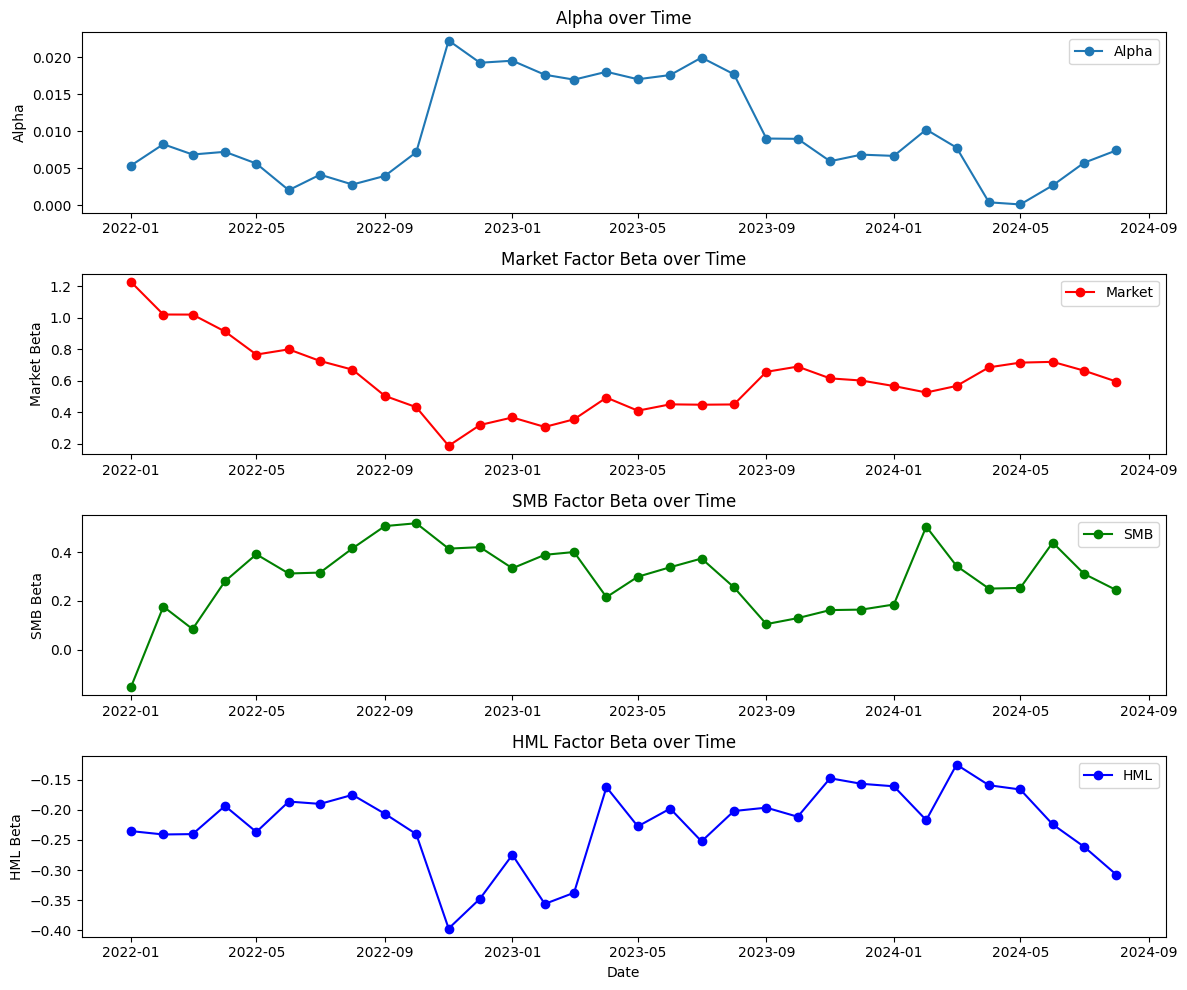

In [22]:
# 適切なカラム名を使用して日付をインデックスに設定
# ここでは仮に 'Date' というカラム名が日付を表していると仮定します
df['Date'] = pd.to_datetime(df['Date'])  # 'Date' を実際のカラム名に置き換えてください
df.set_index('Date', inplace=True)

# 超過リターンの計算
excess_return = df['Portfolio_Return'] - df['Risk_Free_Rate']

# 回帰分析の結果を格納するリスト
alpha_values = []
factor_values = {'Market': [], 'SMB': [], 'HML': []}

# 12か月ローリングウインドウで回帰分析
window_size = 12
for start in range(len(df) - window_size + 1):
    end = start + window_size
    window_data = df.iloc[start:end]
    X = window_data[['Market_Return', 'SMB', 'HML']].values
    y = excess_return[start:end].values
    X = np.column_stack((np.ones(X.shape[0]), X))  # 定数項を追加
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    alpha_values.append(beta[0])
    factor_values['Market'].append(beta[1])
    factor_values['SMB'].append(beta[2])
    factor_values['HML'].append(beta[3])

# 結果をデータフレームに変換
results_df = pd.DataFrame({
    'Alpha': alpha_values,
    'Market': factor_values['Market'],
    'SMB': factor_values['SMB'],
    'HML': factor_values['HML']
}, index=df.index[window_size-1:])

# 結果を表示
print(results_df.head())

import matplotlib.pyplot as plt

# プロットのサイズを設定
plt.figure(figsize=(12, 10))

# アルファ（切片）の時系列プロット
plt.subplot(4, 1, 1)
plt.plot(results_df.index, results_df['Alpha'], marker='o', label='Alpha')
plt.title('Alpha over Time')
plt.ylabel('Alpha')
plt.legend()

# マーケットファクターの係数の時系列プロット
plt.subplot(4, 1, 2)
plt.plot(results_df.index, results_df['Market'], marker='o', color='red', label='Market')
plt.title('Market Factor Beta over Time')
plt.ylabel('Market Beta')
plt.legend()

# SMB ファクターの係数の時系列プロット
plt.subplot(4, 1, 3)
plt.plot(results_df.index, results_df['SMB'], marker='o', color='green', label='SMB')
plt.title('SMB Factor Beta over Time')
plt.ylabel('SMB Beta')
plt.legend()

# HML ファクターの係数の時系列プロット
plt.subplot(4, 1, 4)
plt.plot(results_df.index, results_df['HML'], marker='o', color='blue', label='HML')
plt.title('HML Factor Beta over Time')
plt.xlabel('Date')
plt.ylabel('HML Beta')
plt.legend()

plt.tight_layout()  # 各プロットの間隔を自動調整
plt.show()

In [23]:
# stop

In [24]:
results_df.to_csv('../data/ff_cca_three_factors_analysis.csv')